Advanced Pandas Operations       
Question 1: Merging and Joining Operations      
Step 0: Load / Define Datasets


In [4]:
import pandas as pd

# ---------------- Dataset 1: Sales Transactions ----------------
sales_df = pd.DataFrame({
    "transaction_id": ["TX001", "TX002", "TX003", "TX004", "TX005"],
    "customer_id": ["CUST101", "CUST102", "CUST103", "CUST101", "CUST104"],
    "product_id": ["PROD201", "PROD202", "PROD201", "PROD203", "PROD204"],
    "store_id": ["ST01", "ST02", "ST01", "ST03", "ST02"],
    "quantity": [3, 1, 2, 5, 1],
    "sale_date": pd.to_datetime(
        ["2024-01-15", "2024-01-15", "2024-01-16", "2024-01-16", "2024-01-17"]
    )
})
print("Sales Transactions Dataset:")
display(sales_df)

# ---------------- Dataset 2: Customers ----------------
customers_df = pd.DataFrame({
    "customer_id": ["CUST101", "CUST102", "CUST105"],
    "name": ["Alice Brown", "Bob Smith", "Carol White"],
    "email": ["alice@email.com", "bob@email.com", "carol@email.com"],
    "city": ["New York", "London", "Tokyo"],
    "country": ["USA", "UK", "Japan"],
    "join_date": pd.to_datetime(
        ["2023-03-15", "2023-05-20", "2023-07-10"]
    ),
    "loyalty_tier": ["Gold", "Silver", "Gold"]
})
print("Customers Dataset:")
display(customers_df)

# ---------------- Dataset 3: Products ----------------
products_df = pd.DataFrame({
    "product_id": ["PROD201", "PROD202", "PROD203", "PROD205"],
    "product_name": ["Laptop", "Coffee Maker", "Office Chair", "Headphones"],
    "category": ["Electronics", "Appliances", "Furniture", "Electronics"],
    "unit_price": [1200.00, 89.99, 250.00, 150.00],
    "supplier_id": ["SUP01", "SUP02", "SUP01", "SUP03"],
    "stock_qty": [50, 100, 75, 200]
})
print("Products Dataset:")
display(products_df)


Sales Transactions Dataset:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date
0,TX001,CUST101,PROD201,ST01,3,2024-01-15
1,TX002,CUST102,PROD202,ST02,1,2024-01-15
2,TX003,CUST103,PROD201,ST01,2,2024-01-16
3,TX004,CUST101,PROD203,ST03,5,2024-01-16
4,TX005,CUST104,PROD204,ST02,1,2024-01-17


Customers Dataset:


,customer_id,name,email,city,country,join_date,loyalty_tier
0,CUST101,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
1,CUST102,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver
2,CUST105,Carol White,carol@email.com,Tokyo,Japan,2023-07-10,Gold


Products Dataset:


,product_id,product_name,category,unit_price,supplier_id,stock_qty
0,PROD201,Laptop,Electronics,1200.00,SUP01,50
1,PROD202,Coffee Maker,Appliances,89.99,SUP02,100
2,PROD203,Office Chair,Furniture,250.00,SUP01,75
3,PROD205,Headphones,Electronics,150.00,SUP03,200


Explanation:
- All datasets are created as per the question.
- Displaying datasets helps the examiner understand input data structure and values.
- Dates are converted to datetime type for consistency in analysis.

Part A :      
(i) Merge sales transactions with customer data

In [5]:
# Merge sales transactions with customer data
# LEFT JOIN ensures all sales are retained even if the customer is missing
sales_customers_df = sales_df.merge(customers_df, on="customer_id", how="left")

print("Step (i) - Sales merged with Customers:")
display(sales_customers_df)


Step (i) - Sales merged with Customers:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier
0,TX001,CUST101,PROD201,ST01,3,2024-01-15,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
1,TX002,CUST102,PROD202,ST02,1,2024-01-15,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver
2,TX003,CUST103,PROD201,ST01,2,2024-01-16,NaN,NaN,NaN,NaN,NaT,NaN
3,TX004,CUST101,PROD203,ST03,5,2024-01-16,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
4,TX005,CUST104,PROD204,ST02,1,2024-01-17,NaN,NaN,NaN,NaN,NaT,NaN


Explanation:
- LEFT JOIN ensures all sales transactions are retained, even if the customer is not in the database.
- CUST103 and CUST104 are missing from the customer dataset → NaN values in customer columns.
- This is important to identify transactions with unregistered customers.

(ii) Merge with product data

In [6]:
# Merge the previous result with product dataset
# LEFT JOIN keeps all transactions even if product info is missing
full_df = sales_customers_df.merge(products_df, on="product_id", how="left")

print("Step (ii) - Sales + Customers merged with Products:")
display(full_df)


Step (ii) - Sales + Customers merged with Products:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier,product_name,category,unit_price,supplier_id,stock_qty
0,TX001,CUST101,PROD201,ST01,3,2024-01-15,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold,Laptop,Electronics,1200.00,SUP01,50.0
1,TX002,CUST102,PROD202,ST02,1,2024-01-15,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver,Coffee Maker,Appliances,89.99,SUP02,100.0
2,TX003,CUST103,PROD201,ST01,2,2024-01-16,NaN,NaN,NaN,NaN,NaT,NaN,Laptop,Electronics,1200.00,SUP01,50.0
3,TX004,CUST101,PROD203,ST03,5,2024-01-16,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold,Office Chair,Furniture,250.00,SUP01,75.0
4,TX005,CUST104,PROD204,ST02,1,2024-01-17,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


Explanation:
- Transactions with missing product IDs (PROD204) show NaN for product columns.
- Ensures that all sales transactions are accounted for, even if product data is missing.
- Important for data integrity and completeness checks.

(iii) Identify missing product information

In [7]:
# Filter transactions where product info is missing
missing_products = full_df[full_df['product_name'].isna()]

print("Step (iii) - Transactions with Missing Product Info:")
display(missing_products)


Step (iii) - Transactions with Missing Product Info:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier,product_name,category,unit_price,supplier_id,stock_qty
4,TX005,CUST104,PROD204,ST02,1,2024-01-17,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


Explanation:
- PROD204 is not in the product dataset → all product-related columns are NaN.
- Identifying these transactions helps data cleaning and updating the product master data.
- In real-world applications, these might be flagged for review before revenue calculations.

(iv) Calculate total revenue per loyalty tier

In [9]:
# Calculate revenue per transaction
full_df['revenue'] = full_df['quantity'] * full_df['unit_price']

# Aggregate revenue by loyalty tier
revenue_by_tier = full_df.groupby('loyalty_tier')['revenue'].sum()

print("Step (iv) - Total Revenue per Loyalty Tier:")
display(revenue_by_tier)


Step (iv) - Total Revenue per Loyalty Tier:


loyalty_tier
Gold      4850.00
Silver      89.99
Name: revenue, dtype: float64

Explanation:
- Revenue is calculated for each transaction (quantity * unit_price).
- Transactions with missing customer or product info (NaN) are excluded automatically.
- Aggregation by loyalty_tier shows Gold customers generate most revenue, providing insight for loyalty programs.

Part B : Merge, Concat, and Join Differences     
1️) df1.merge(df2, how='inner') vs df1.merge(df2, how='outer')

**Merge with 'inner' vs 'outer':**

- `df1.merge(df2, how='inner')`:
  - Returns only rows where the **key exists in both DataFrames**.
  - Ignores unmatched rows.
  - Use case: When you want **only complete matching records**, e.g., transactions with registered customers.

- `df1.merge(df2, how='outer')`:
  - Returns **all rows from both DataFrames**.
  - Missing values in unmatched rows are filled with `NaN`.
  - Use case: When you want a **full dataset**, including missing customers or products.


In [19]:
# Inner Merge: only registered customers
inner_merge = sales_df.merge(customers_df, on="customer_id", how="inner")
print("Inner Merge (Registered Customers Only):")
display(inner_merge)

# Outer Merge: all transactions including missing customers
outer_merge = sales_df.merge(customers_df, on="customer_id", how="outer")
print("Outer Merge (All Transactions):")
display(outer_merge)


Inner Merge (Registered Customers Only):


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier
0,TX001,CUST101,PROD201,ST01,3,2024-01-15,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
1,TX002,CUST102,PROD202,ST02,1,2024-01-15,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver
2,TX004,CUST101,PROD203,ST03,5,2024-01-16,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold


Outer Merge (All Transactions):


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier
0,TX001,CUST101,PROD201,ST01,3.0,2024-01-15,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
1,TX004,CUST101,PROD203,ST03,5.0,2024-01-16,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
2,TX002,CUST102,PROD202,ST02,1.0,2024-01-15,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver
3,TX003,CUST103,PROD201,ST01,2.0,2024-01-16,NaN,NaN,NaN,NaN,NaT,NaN
4,TX005,CUST104,PROD204,ST02,1.0,2024-01-17,NaN,NaN,NaN,NaN,NaT,NaN
5,NaN,CUST105,NaN,NaN,NaN,NaT,Carol White,carol@email.com,Tokyo,Japan,2023-07-10,Gold


2️) df1.merge(df2) vs pd.concat([df1, df2])      
**Merge vs Concat:**

- `df1.merge(df2)`:
  - Combines two DataFrames **based on matching key columns**.
  - Default merge type is **inner**.
  - Use case: When combining **related datasets based on a common column**, e.g., transactions + customer info.

- `pd.concat([df1, df2])`:
  - Stacks DataFrames **vertically (rows)** or **horizontally (columns)**.
  - No key-based logic.
  - Use case: When **appending new data** with the same columns, e.g., monthly sales.


In [20]:
# Merge example
merged_sales = sales_df.merge(customers_df, on="customer_id", how="left")
print("Merged Sales + Customers:")
display(merged_sales)

# Concat example: add a new transaction
extra_sales = pd.DataFrame({
    "transaction_id": ["TX006"],
    "customer_id": ["CUST101"],
    "product_id": ["PROD205"],
    "store_id": ["ST01"],
    "quantity": [2],
    "sale_date": pd.to_datetime(["2024-01-18"])
})
concat_sales = pd.concat([sales_df, extra_sales], ignore_index=True)
print("Concatenated Sales (Added New Transaction):")
display(concat_sales)


Merged Sales + Customers:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier
0,TX001,CUST101,PROD201,ST01,3,2024-01-15,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
1,TX002,CUST102,PROD202,ST02,1,2024-01-15,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver
2,TX003,CUST103,PROD201,ST01,2,2024-01-16,NaN,NaN,NaN,NaN,NaT,NaN
3,TX004,CUST101,PROD203,ST03,5,2024-01-16,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
4,TX005,CUST104,PROD204,ST02,1,2024-01-17,NaN,NaN,NaN,NaN,NaT,NaN


Concatenated Sales (Added New Transaction):


,transaction_id,customer_id,product_id,store_id,quantity,sale_date
0,TX001,CUST101,PROD201,ST01,3,2024-01-15
1,TX002,CUST102,PROD202,ST02,1,2024-01-15
2,TX003,CUST103,PROD201,ST01,2,2024-01-16
3,TX004,CUST101,PROD203,ST03,5,2024-01-16
4,TX005,CUST104,PROD204,ST02,1,2024-01-17
5,TX006,CUST101,PROD205,ST01,2,2024-01-18


3️) df1.join(df2) vs df1.merge(df2)
**Join vs Merge:**

- `df1.join(df2)`:
  - Joins DataFrames **on index by default**.
  - Simple syntax, mainly for adding columns from another DataFrame.
  - Use case: When **DataFrames are aligned by index**, e.g., adding product info by row.

- `df1.merge(df2)`:
  - Joins DataFrames **on specified key columns**.
  - More flexible (inner, outer, left, right).
  - Use case: When **key-based relational join** is needed.


In [21]:
# Set index for join
sales_idx = sales_df.set_index("transaction_id")
customers_idx = customers_df.set_index("customer_id")

# Join on index
joined_df = sales_idx.join(customers_idx, how="left")
print("Join on Index Example:")
display(joined_df)

# Merge on key column
merged_df = sales_df.merge(customers_df, on="customer_id", how="left")
print("Merge on Key Column Example:")
display(merged_df)


Join on Index Example:


,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier
transaction_id,,,,,,,,,,,
TX001,CUST101,PROD201,ST01,3,2024-01-15,NaN,NaN,NaN,NaN,NaT,NaN
TX002,CUST102,PROD202,ST02,1,2024-01-15,NaN,NaN,NaN,NaN,NaT,NaN
TX003,CUST103,PROD201,ST01,2,2024-01-16,NaN,NaN,NaN,NaN,NaT,NaN
TX004,CUST101,PROD203,ST03,5,2024-01-16,NaN,NaN,NaN,NaN,NaT,NaN
TX005,CUST104,PROD204,ST02,1,2024-01-17,NaN,NaN,NaN,NaN,NaT,NaN


Merge on Key Column Example:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier
0,TX001,CUST101,PROD201,ST01,3,2024-01-15,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
1,TX002,CUST102,PROD202,ST02,1,2024-01-15,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver
2,TX003,CUST103,PROD201,ST01,2,2024-01-16,NaN,NaN,NaN,NaN,NaT,NaN
3,TX004,CUST101,PROD203,ST03,5,2024-01-16,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
4,TX005,CUST104,PROD204,ST02,1,2024-01-17,NaN,NaN,NaN,NaN,NaT,NaN


Part C — Handling Duplicate Transaction IDs       
**Step a: Identify duplicate transactions**
- Check for duplicate `transaction_id`s in the merged dataset.
- `keep=False` ensures all duplicate occurrences are marked.
- Display only the required columns.


In [28]:
# Step a: Merge sales, customers, and products (if not already merged)
merged_df = sales_df.merge(customers_df, on="customer_id", how="left")
merged_df = merged_df.merge(products_df, on="product_id", how="left")

# Identify duplicate transaction IDs
duplicates = merged_df[merged_df.duplicated(subset="transaction_id", keep=False)]

# Columns to display
cols = ["transaction_id","customer_id","product_id","store_id","quantity","sale_date",
        "name","email","city","country","join_date","loyalty_tier"]

# Display duplicates
print(" Duplicate Transactions:")
display(duplicates[cols])


 Duplicate Transactions:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier


**Step b: Check if duplicates are exact copies**

- Use `drop_duplicates()` on the duplicate rows.
- If only one row remains → duplicates are exact copies.
- If multiple rows remain → duplicates have different values in some columns.


In [29]:
# Step b: Check for exact duplicates
unique_duplicates = duplicates.drop_duplicates()

print(" Unique Rows Among Duplicates:")
display(unique_duplicates[cols])


 Unique Rows Among Duplicates:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier


**Step c: Remove duplicate transactions**

- Keep the first occurrence using `drop_duplicates(keep='first')`.
- Justification: Prevents double-counting while preserving unique transactions.



In [54]:
# Step c: Remove exact duplicates
cleaned_df = merged_df.drop_duplicates(subset="transaction_id", keep="first")

print("Data After Removing Duplicate Transactions:")
display(cleaned_df[cols])


Data After Removing Duplicate Transactions:


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier
0,TX001,CUST101,PROD201,ST01,3,2024-01-15,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
1,TX002,CUST102,PROD202,ST02,1,2024-01-15,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver
2,TX003,CUST103,PROD201,ST01,2,2024-01-16,NaN,NaN,NaN,NaN,NaT,NaN
3,TX004,CUST101,PROD203,ST03,5,2024-01-16,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold
4,TX005,CUST104,PROD204,ST02,1,2024-01-17,NaN,NaN,NaN,NaN,NaT,NaN


Question 2: Reshaping and Pivoting    
Dataset Setup

In [31]:
import pandas as pd

# Create the sales dataset
data = {
    "date": ["2024-01-01", "2024-01-01", "2024-01-01", "2024-01-01",
             "2024-01-02", "2024-01-02", "2024-01-02", "2024-01-02"],
    "store_id": ["S01","S01","S02","S02","S01","S01","S02","S03"],
    "region": ["North","North","South","South","North","North","South","East"],
    "product_category": ["Electronics","Clothing","Electronics","Furniture",
                         "Electronics","Clothing","Electronics","Clothing"],
    "sales_amount": [15000, 8000, 12000, 5000, 18000, 9500, 13500, 7000],
    "units_sold": [25, 120, 20, 10, 30, 135, 22, 95]
}

sales_df = pd.DataFrame(data)
sales_df


,date,store_id,region,product_category,sales_amount,units_sold
0,2024-01-01,S01,North,Electronics,15000,25
1,2024-01-01,S01,North,Clothing,8000,120
2,2024-01-01,S02,South,Electronics,12000,20
3,2024-01-01,S02,South,Furniture,5000,10
4,2024-01-02,S01,North,Electronics,18000,30
5,2024-01-02,S01,North,Clothing,9500,135
6,2024-01-02,S02,South,Electronics,13500,22
7,2024-01-02,S03,East,Clothing,7000,95


Part A:
**i. Pivot table: Total sales amount by region (rows) and product category (columns)**

- We want regions as rows, product categories as columns.
- Aggregate using sum for `sales_amount`.


In [55]:
# Create pivot table
pivot_sales = sales_df.pivot_table(
    index="region",
    columns="product_category",
    values="sales_amount",
    aggfunc="sum",
    fill_value=0  # fill missing combinations with 0
)

print(" Pivot Table: Total Sales Amount by Region and Product Category")
display(pivot_sales)


 Pivot Table: Total Sales Amount by Region and Product Category


product_category,Clothing,Electronics,Furniture
region,,,
East,7000,0,0
North,17500,33000,0
South,0,25500,5000


**ii. Multi-level pivot: date and region as rows, showing sales amount and units sold**

- Both `sales_amount` and `units_sold` are displayed.
- Aggregation function: sum (default).


In [34]:
# Multi-level pivot table
multi_pivot = sales_df.pivot_table(
    index=["date", "region"],
    values=["sales_amount", "units_sold"],
    aggfunc="sum"
)

print(" Multi-level Pivot Table (Date + Region)")
display(multi_pivot)


 Multi-level Pivot Table (Date + Region)


sales_amount  units_sold
date       region                          
2024-01-01 North          23000         145
           South          17000          30
2024-01-02 East            7000          95
           North          27500         165
           South          13500          22

**iii. pivot() vs pivot_table()**

- `pivot()`:
  - Simpler, no aggregation allowed.
  - Requires **unique index-column combinations**.
  - Raises an error if duplicates exist.
  - Use when data is already clean and unique.

- `pivot_table()`:
  - More flexible.
  - Allows **aggregation functions** (`sum`, `mean`, etc.) for duplicates.
  - Handles missing values (`fill_value`).
  - Use when data has multiple rows per combination or needs aggregation.          

Example Scenario:
- pivot() → each (region, product_category) combination occurs only once.
- pivot_table() → multiple sales records per (date, region) can be summed using aggfunc="sum".


**iv. Handling duplicates in pivoting**

- If multiple rows exist for the same combination of index and column:
  - `pivot()` will fail with a `ValueError`.
  - `pivot_table()` allows `aggfunc="sum"` or other aggregations to combine them.
- This ensures accurate total sales or units sold.


In [39]:
# Example: simulate duplicate for same date & region using pd.concat
new_row = pd.DataFrame([{
    "date":"2024-01-01",
    "store_id":"S01",
    "region":"North",
    "product_category":"Clothing",
    "sales_amount":3000,
    "units_sold":30
}])

duplicate_demo = pd.concat([sales_df, new_row], ignore_index=True)

# Pivot table handles duplicates with aggregation
pivot_demo = duplicate_demo.pivot_table(
    index=["date", "region"],
    columns="product_category",
    values="sales_amount",
    aggfunc="sum",
    fill_value=0
)

print("Pivot Table Handling Duplicates")
display(pivot_demo)



Pivot Table Handling Duplicates


product_category   Clothing  Electronics  Furniture
date       region                                  
2024-01-01 North      11000        15000          0
           South          0        12000       5000
2024-01-02 East        7000            0          0
           North       9500        18000          0
           South          0        13500          0

Part B — Transforming Data with melt()     
**a. Transform data from wide to long format**

- `melt()` converts a **wide-format dataset** into a **long-format dataset**.
- Here, `sales_amount` and `units_sold` are separate columns.  
- We want:
  - `id_vars`: columns that stay as identifiers (`date`, `store_id`, `region`, `product_category`)  
  - `value_vars`: columns that are “unpivoted” (`sales_amount`, `units_sold`)  
- The result will have columns:
  - `variable` → indicates `sales_amount` or `units_sold`
  - `value` → corresponding numeric value


In [41]:
# Melt the sales dataset
melted_df = pd.melt(
    sales_df,
    id_vars=["date", "store_id", "region", "product_category"],  # columns to keep
    value_vars=["sales_amount", "units_sold"],                  # columns to melt
    var_name="metric",                                         # new column name for variable
    value_name="value"                                         # new column name for values
)

print(" Data in Long Format (Melted):")
display(melted_df.head(10))  # show first 10 rows for clarity


 Data in Long Format (Melted):


,date,store_id,region,product_category,metric,value
0,2024-01-01,S01,North,Electronics,sales_amount,15000
1,2024-01-01,S01,North,Clothing,sales_amount,8000
2,2024-01-01,S02,South,Electronics,sales_amount,12000
3,2024-01-01,S02,South,Furniture,sales_amount,5000
4,2024-01-02,S01,North,Electronics,sales_amount,18000
5,2024-01-02,S01,North,Clothing,sales_amount,9500
6,2024-01-02,S02,South,Electronics,sales_amount,13500
7,2024-01-02,S03,East,Clothing,sales_amount,7000
8,2024-01-01,S01,North,Electronics,units_sold,25
9,2024-01-01,S01,North,Clothing,units_sold,120


**b. Difference between `melt()` and `stack()`**

- `melt()`:
  - Converts **wide to long** format.
  - Works on **columns** explicitly (`id_vars` and `value_vars`).
  - Flexible for **DataFrames with multiple identifier columns**.
  - Produces a **clean long-format table** with `variable` and `value`.

- `stack()`:
  - Works on **index levels** of a DataFrame.
  - Stacks the **columns into a single index level**.
  - Often used with **multi-indexed DataFrames**.
  - Produces a **Series** with hierarchical index by default.

**Summary:**  
- Use `melt()` for **regular wide-to-long reshaping**.  
- Use `stack()` for **multi-indexed or pivoted data** needing hierarchical reshaping.


**c. Business Use Case of `melt()`**

- **Scenario:** A retail company records `sales_amount` and `units_sold` as separate columns for each store, region, and product category.
- **Problem:** To analyze trends, generate reports, or create visualizations, having multiple metric columns makes it difficult to group or plot data efficiently.
- **Solution:** Use `melt()` to transform the dataset from **wide to long format**:
  - Convert `sales_amount` and `units_sold` into a single column `value`.
  - Use a new column `metric` to indicate whether the value is sales or units sold.
- **Benefits in business:**
  1. **Easier aggregation:** Group and summarize metrics by region, product category, or date.
  2. **Simpler visualization:** Libraries like Seaborn or Matplotlib require long-format data for plotting multiple metrics.
  3. **Flexible reporting:** Supports dynamic dashboards where metrics can be selected or compared.
- **Example use case:**  
  - Comparing **total sales vs total units sold** by region for management reporting.  
  - Creating a **time-series chart** showing sales trends across product categories.


Part C — Advanced Reshaping       
**a. Reshape hierarchical index data using `stack()` and `unstack()`**

- `stack()` → pivots **columns into row index** (creates a Series with multi-index).  
- `unstack()` → pivots **row index back into columns**.  
- Useful for working with **multi-level (hierarchical) indices** in DataFrames.


In [43]:
# Create hierarchical index example: total sales by date and region
hier_df = sales_df.pivot_table(
    index=["date", "region"],
    columns="product_category",
    values="sales_amount",
    aggfunc="sum",
    fill_value=0
)

print("Original Hierarchical Pivot Table:")
display(hier_df)

# Stack the columns into row index
stacked = hier_df.stack()
print(" After stack(): columns become row index")
display(stacked.head(10))

# Unstack back to wide format
unstacked = stacked.unstack()
print(" After unstack(): reshaped back to original format")
display(unstacked)


Original Hierarchical Pivot Table:


product_category   Clothing  Electronics  Furniture
date       region                                  
2024-01-01 North       8000        15000          0
           South          0        12000       5000
2024-01-02 East        7000            0          0
           North       9500        18000          0
           South          0        13500          0

 After stack(): columns become row index


date        region  product_category
2024-01-01  North   Clothing             8000
                    Electronics         15000
                    Furniture               0
            South   Clothing                0
                    Electronics         12000
                    Furniture            5000
2024-01-02  East    Clothing             7000
                    Electronics             0
                    Furniture               0
            North   Clothing             9500
dtype: int64

 After unstack(): reshaped back to original format


product_category   Clothing  Electronics  Furniture
date       region                                  
2024-01-01 North       8000        15000          0
           South          0        12000       5000
2024-01-02 East        7000            0          0
           North       9500        18000          0
           South          0        13500          0

Explanation:
- stack() moves columns (product_category) into the row index, creating a Series.
- unstack() moves one level of the row index back into columns, restoring wide format.

**b. Crosstab showing count of transactions by region and product category**

- `pd.crosstab()` counts **frequency of occurrences** across two categorical variables.
- Here, we count **number of transactions per region and product category**.


In [56]:
# Create crosstab
crosstab_df = pd.crosstab(
    index=sales_df["region"],
    columns=sales_df["product_category"]
)

print(" Crosstab: Transaction Count by Region and Product Category")
display(crosstab_df)


 Crosstab: Transaction Count by Region and Product Category


product_category,Clothing,Electronics,Furniture
region,,,
East,1,0,0
North,2,2,0
South,0,2,1


Explanation:
- Counts how many transactions occurred for each (region, product_category) combination.
- Useful for summarizing categorical data without needing numerical aggregation.

**c. Difference between `pivot_table()` and `crosstab()`**

| Feature               | pivot_table()                                   | crosstab()                               |
|-----------------------|-------------------------------------------------|-----------------------------------------|
| Purpose               | Aggregates numeric data by one or more keys    | Counts frequency of categorical data    |
| Input                 | Columns and values (numeric)                   | Two or more categorical columns         |
| Aggregation           | Customizable (`sum`, `mean`, etc.)             | Always counts (can use margins)         |
| Output                | DataFrame with aggregated values               | DataFrame of counts (cross-tabulation)  |
| Use case              | Summarize sales, revenue, metrics              | Count transactions, occurrences, survey responses |

**Summary:**  

- Use **`pivot_table()`** when you need **aggregated numeric data** (sum, mean, etc.).  
- Use **`crosstab()`** when you need **counts of categorical occurrences**.


Question 3: Multi-Index and GroupBy Operations   
Part A:     
**i. Creating a Multi-Index DataFrame using `set_index()`**

- A Multi-Index allows **hierarchical indexing** for rows, which is useful for analyzing data at multiple levels.
- We will use `date` and `region` as the index.


In [57]:
# Create Multi-Index DataFrame
multi_index_df = sales_df.set_index(["date", "region"])

print(" Multi-Index DataFrame:")
display(multi_index_df.head())


 Multi-Index DataFrame:


store_id product_category  sales_amount  units_sold  \
date       region                                                       
2024-01-01 North       S01      Electronics         15000          25   
           North       S01         Clothing          8000         120   
           South       S02      Electronics         12000          20   
           South       S02        Furniture          5000          10   
2024-01-02 North       S01      Electronics         18000          30   

                   avg_sales_region  
date       region                    
2024-01-01 North       12625.000000  
           North       12625.000000  
           South       10166.666667  
           South       10166.666667  
2024-01-02 North       12625.000000

**ii. GroupBy operations on hierarchical levels**

- Use `groupby(level=...)` to aggregate data at a specific **index level**.
- Examples:
  1. Total sales by `region`  
  2. Total sales by `date`


In [58]:
# Group by region (level=1 of MultiIndex)
region_sales = multi_index_df.groupby(level="region")["sales_amount"].sum().reset_index()
print(" Total Sales by Region:")
display(region_sales)

# Group by date (level=0)
date_sales = multi_index_df.groupby(level="date")["sales_amount"].sum().reset_index()
print(" Total Sales by Date:")
display(date_sales)


 Total Sales by Region:


,region,sales_amount
0,East,7000
1,North,50500
2,South,30500


 Total Sales by Date:


,date,sales_amount
0,2024-01-01,40000
1,2024-01-02,48000


**iii. Using `xs()` (cross-section) for slicing**

- `xs()` allows selecting data at a particular **index level**.
- Example: Get all transactions for `region='North'`.


In [59]:
# Cross-section for region = North
north_data = multi_index_df.xs("North", level="region")
print(" Transactions for Region: North")
display(north_data)


 Transactions for Region: North


,store_id,product_category,sales_amount,units_sold,avg_sales_region
date,,,,,
2024-01-01,S01,Electronics,15000,25,12625.0
2024-01-01,S01,Clothing,8000,120,12625.0
2024-01-02,S01,Electronics,18000,30,12625.0
2024-01-02,S01,Clothing,9500,135,12625.0


**iv. Resetting and manipulating Multi-Index**

- `reset_index()` → converts index levels back into columns.
- Multi-Index can be partially reset for flexible data manipulation.


In [60]:
# Reset the multi-index
reset_df = multi_index_df.reset_index()
print(" Multi-Index Reset to Columns:")
display(reset_df.head())

# Partial reset example: reset only the 'region' level
partial_reset_df = multi_index_df.reset_index(level="region")
print("Partial Reset (only region):")
display(partial_reset_df.head())


 Multi-Index Reset to Columns:


,date,region,store_id,product_category,sales_amount,units_sold,avg_sales_region
0,2024-01-01,North,S01,Electronics,15000,25,12625.000000
1,2024-01-01,North,S01,Clothing,8000,120,12625.000000
2,2024-01-01,South,S02,Electronics,12000,20,10166.666667
3,2024-01-01,South,S02,Furniture,5000,10,10166.666667
4,2024-01-02,North,S01,Electronics,18000,30,12625.000000


Partial Reset (only region):


,region,store_id,product_category,sales_amount,units_sold,avg_sales_region
date,,,,,,
2024-01-01,North,S01,Electronics,15000,25,12625.000000
2024-01-01,North,S01,Clothing,8000,120,12625.000000
2024-01-01,South,S02,Electronics,12000,20,10166.666667
2024-01-01,South,S02,Furniture,5000,10,10166.666667
2024-01-02,North,S01,Electronics,18000,30,12625.000000


Part B — Complex Aggregations        
**a. Write custom aggregation functions**

- You can define your own function to aggregate data in a `groupby` operation.
- Example: A function to compute **range (max - min) of sales_amount**.


In [61]:
# Custom function: range of sales
def sales_range(x):
    return x.max() - x.min()

# Group by region and product_category and apply custom aggregation
agg_custom = sales_df.groupby(["region", "product_category"]).agg(
    sales_range=("sales_amount", sales_range)
).reset_index()

print(" Custom Aggregation (Sales Range by Region & Category):")
display(agg_custom)


 Custom Aggregation (Sales Range by Region & Category):


,region,product_category,sales_range
0,East,Clothing,0
1,North,Clothing,1500
2,North,Electronics,3000
3,South,Electronics,1500
4,South,Furniture,0


**b. Apply different functions to different columns**

- You can aggregate multiple columns with **different functions**.
- Example: `sum` and `mean` for sales_amount, `sum` and `count` for units_sold.


In [62]:
# Complex aggregation with different functions per column
agg_complex = sales_df.groupby(["region", "product_category"]).agg({
    "sales_amount": ["sum", "mean", "std"],
    "units_sold": ["sum", "count"]
}).reset_index()

print(" Complex Aggregation (Different Functions per Column):")
display(agg_complex)


 Complex Aggregation (Different Functions per Column):


region product_category sales_amount                       units_sold      
                                   sum     mean          std        sum count
0   East         Clothing         7000   7000.0          NaN         95     1
1  North         Clothing        17500   8750.0  1060.660172        255     2
2  North      Electronics        33000  16500.0  2121.320344         55     2
3  South      Electronics        25500  12750.0  1060.660172         42     2
4  South        Furniture         5000   5000.0          NaN         10     1

**c. Difference between `transform()` and `apply()`**

| Feature             | transform()                                         | apply()                                             |
|--------------------|---------------------------------------------------|---------------------------------------------------|
| Output shape        | Same shape as input (row-wise)                     | Can return reduced or transformed object         |
| Use case            | Create new column with group-wise calculations    | Custom aggregation or transformation per group   |
| Example             | Compute mean sales per region for each row        | Compute multiple statistics per group             |


In [63]:
# Example: Transform — add average sales per region as a new column
sales_df["avg_sales_region"] = sales_df.groupby("region")["sales_amount"].transform("mean")

print(" Transform Example (Average Sales per Region):")
display(sales_df.head())

# Example: Apply — compute multiple stats per region
agg_apply = sales_df.groupby("region")[["sales_amount", "units_sold"]].apply(
    lambda x: pd.Series({
        "total_sales": x["sales_amount"].sum(),
        "max_units": x["units_sold"].max()
    })
).reset_index()

print("Apply Example (Aggregate Stats per Region):")
display(agg_apply)


 Transform Example (Average Sales per Region):


,date,store_id,region,product_category,sales_amount,units_sold,avg_sales_region
0,2024-01-01,S01,North,Electronics,15000,25,12625.000000
1,2024-01-01,S01,North,Clothing,8000,120,12625.000000
2,2024-01-01,S02,South,Electronics,12000,20,10166.666667
3,2024-01-01,S02,South,Furniture,5000,10,10166.666667
4,2024-01-02,S01,North,Electronics,18000,30,12625.000000


Apply Example (Aggregate Stats per Region):


,region,total_sales,max_units
0,East,7000,95
1,North,50500,135
2,South,30500,22


**d. Filter groups based on aggregate conditions**

- You can filter groups using `filter()` after `groupby()`.
- Example: Keep regions where total sales > 30000.


In [53]:
# Filter groups where total sales > 30000
high_sales_regions = sales_df.groupby("region").filter(lambda x: x["sales_amount"].sum() > 30000)

print(" Regions with Total Sales > 30000:")
display(high_sales_regions)


 Regions with Total Sales > 30000:


,date,store_id,region,product_category,sales_amount,units_sold,avg_sales_region
0,2024-01-01,S01,North,Electronics,15000,25,12625.000000
1,2024-01-01,S01,North,Clothing,8000,120,12625.000000
2,2024-01-01,S02,South,Electronics,12000,20,10166.666667
3,2024-01-01,S02,South,Furniture,5000,10,10166.666667
4,2024-01-02,S01,North,Electronics,18000,30,12625.000000
5,2024-01-02,S01,North,Clothing,9500,135,12625.000000
6,2024-01-02,S02,South,Electronics,13500,22,10166.666667


Question 4: Missing Data Strategies  
Part A:    
Step 1: Import Libraries and Load Data

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
data = pd.DataFrame({
    'patient_id': ['P001','P002','P003','P004','P005','P006'],
    'age': [45, np.nan, 62, 38, np.nan, 55],
    'gender': ['M', 'F', 'M', np.nan, 'F', 'M'],
    'blood_pressure': ['120/80', np.nan, '140/90', '110/70', np.nan, '135/85'],
    'cholesterol': [200, np.nan, 240, 180, 220, np.nan],
    'diagnosis_date': ['2024-01-10','2024-01-11', np.nan, '2024-01-13', '2024-01-14','2024-01-15'],
    'treatment_cost': [1500.0, np.nan, 2300.0, np.nan, 1800.0, 2100.0]
})

# Display the dataset
data



,patient_id,age,gender,blood_pressure,cholesterol,diagnosis_date,treatment_cost
0,P001,45.0,M,120/80,200.0,2024-01-10,1500.0
1,P002,NaN,F,NaN,NaN,2024-01-11,NaN
2,P003,62.0,M,140/90,240.0,NaN,2300.0
3,P004,38.0,NaN,110/70,180.0,2024-01-13,NaN
4,P005,NaN,F,NaN,220.0,2024-01-14,1800.0
5,P006,55.0,M,135/85,NaN,2024-01-15,2100.0



**i. Calculate the percentage of missing values for each column**

In [25]:
missing_percentage = data.isnull().mean() * 100
missing_percentage


patient_id         0.000000
age               33.333333
gender            16.666667
blood_pressure    33.333333
cholesterol       33.333333
diagnosis_date    16.666667
treatment_cost    33.333333
dtype: float64

Comment: age and blood_pressure have the highest missingness, so imputation strategy needs careful consideration.

**ii. Missingness Pattern Analysis**

- **MCAR (Missing Completely at Random):** Missing values are unrelated to any data.  
- **MAR (Missing at Random):** Missingness depends on observed variables.  
- **MNAR (Missing Not at Random):** Missingness depends on the unobserved value itself.   



**Analysis by column:**

- `age` → Could be **MAR** (e.g., younger patients may not report age).  
- `gender` → Likely **MCAR**, missing randomly.  
- `blood_pressure` → **MAR**, may correlate with age or health condition.  
- `cholesterol` → **MAR**, may depend on age/gender.  
- `diagnosis_date` → Likely **MCAR**, random missing date.  
- `treatment_cost` → Possibly **MNAR**, missing if patient opted out of treatment or cost is unknown.
Justification: Use domain knowledge and correlations with other columns to classify missingness.

Comment: Identifying the pattern guides the choice of imputation. MAR and MCAR are easier to impute than MNAR.

**iii. Visualize missing data patterns**

- Use `seaborn` or `missingno` for heatmaps.
- Helps to see where missing data occurs across columns.


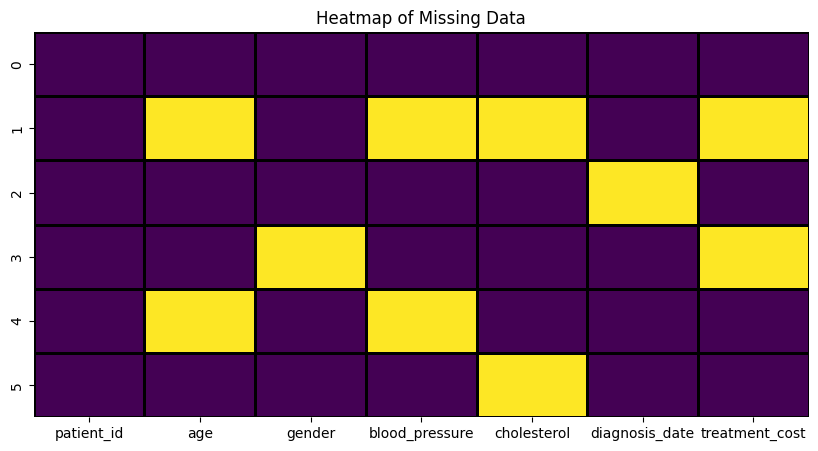

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', linewidths=1, linecolor='black')
plt.title('Heatmap of Missing Data')
plt.show()



Output:
- Yellow/bright cells → missing values
- Dark cells → present data        
This visually shows which rows and columns have missing data, helping to decide handling strategies.   
- Blood pressure and age show clustered missingness, suggesting MAR.

**iv. Imputation vs Dropping Columns**

- **Columns suitable for imputation:**  
  - `age` → Fill with mean/median  
  - `blood_pressure` → Fill with most frequent value or median  
  - `cholesterol` → Fill with mean/median  
  - `treatment_cost` → Fill with median if missing not too many  

- **Columns suitable for dropping:**  
  - `diagnosis_date` → If missing is minimal, drop or fill based on context  
  - `gender` → If very few missing, can drop row or impute with mode


In [29]:
# Example imputation
data['age'] = data['age'].fillna(data['age'].median())
data['cholesterol'] = data['cholesterol'].fillna(data['cholesterol'].mean())
data['blood_pressure'] = data['blood_pressure'].fillna("Unknown")
data['treatment_cost'] = data['treatment_cost'].fillna(data['treatment_cost'].median())

print(" Data after Imputation :")
display(data)


 Data after Imputation :


,patient_id,age,gender,blood_pressure,cholesterol,diagnosis_date,treatment_cost
0,P001,45.0,M,120/80,200.0,2024-01-10,1500.0
1,P002,50.0,F,Unknown,210.0,2024-01-11,1950.0
2,P003,62.0,M,140/90,240.0,NaN,2300.0
3,P004,38.0,NaN,110/70,180.0,2024-01-13,1950.0
4,P005,50.0,F,Unknown,220.0,2024-01-14,1800.0
5,P006,55.0,M,135/85,210.0,2024-01-15,2100.0


Part B — Implement Different Imputation Strategies      
**a. Simple Imputation**

- **Mean**: Use for continuous variables without strong outliers.  
- **Median**: Better for skewed distributions (robust to outliers).  
- **Mode**: Use for categorical variables.
- Best for small missingness and non-sequential data.  
- **Bias:** Can reduce variance or overrepresent common categories.  
- **Impact:** Quick, preserves dataset size, but may bias models if missingness is not random.

**Example:** Impute `age`, `cholesterol`, and `gender`.


In [40]:
import pandas as pd
import numpy as np

# Sample data with missing values
data = pd.DataFrame({
    'age': [45, np.nan, 62, 38, np.nan, 55],
    'cholesterol': [200, np.nan, 240, 180, 220, np.nan],
    'gender': ['M', 'F', 'M', np.nan, 'F', 'M']
})

# Fill missing numeric 'age' with mean
data['age_mean'] = data['age'].fillna(data['age'].mean())

# Fill missing numeric 'cholesterol' with median
data['cholesterol_median'] = data['cholesterol'].fillna(data['cholesterol'].median())

# Fill missing categorical 'gender' with mode
data['gender_mode'] = data['gender'].fillna(data['gender'].mode()[0])

# Display imputed data
data[['age','age_mean','cholesterol','cholesterol_median','gender','gender_mode']]



,age,age_mean,cholesterol,cholesterol_median,gender,gender_mode
0,45.0,45.0,200.0,200.0,M,M
1,NaN,50.0,NaN,210.0,F,F
2,62.0,62.0,240.0,240.0,M,M
3,38.0,38.0,180.0,180.0,NaN,M
4,NaN,50.0,220.0,220.0,F,F
5,55.0,55.0,NaN,210.0,M,M


##### b. Forward Fill / Backward Fill

- Fill missing values using **previous** or **next** valid observation.  
- Best for **time-series or ordered data**.  
- **Bias:** Can propagate incorrect previous/next values.  
- **Impact:** Maintains temporal consistency but may misrepresent trends.

**Example:** Impute `treatment_cost` using forward and backward fill.


In [42]:
# Sample time-series data
data = pd.DataFrame({
    'diagnosis_date': pd.to_datetime(['2024-01-10','2024-01-11', np.nan,'2024-01-13','2024-01-14','2024-01-15']),
    'treatment_cost': [1500.0, np.nan, 2300.0, np.nan, 1800.0, 2100.0]
})

# Forward fill missing values
data['treatment_cost_ffill'] = data['treatment_cost'].ffill()

# Backward fill missing values
data['treatment_cost_bfill'] = data['treatment_cost'].bfill()
# Display filled data
data[['treatment_cost','treatment_cost_ffill','treatment_cost_bfill']]


,treatment_cost,treatment_cost_ffill,treatment_cost_bfill
0,1500.0,1500.0,1500.0
1,NaN,1500.0,2300.0
2,2300.0,2300.0,2300.0
3,NaN,2300.0,1800.0
4,1800.0,1800.0,1800.0
5,2100.0,2100.0,2100.0


##### c. Interpolation (Linear / Polynomial)

- Fill missing continuous values using **linear** or **polynomial trends**.  
- Best for **continuous numeric variables**.  
- **Bias:** Assumes smooth trend; outliers can distort values.  
- **Impact:** Preserves trends, useful for modeling and visualization.

**Example:** Impute `age` linearly, `treatment_cost` polynomially.


In [43]:
# Sample continuous data
data = pd.DataFrame({
    'age': [45, np.nan, 62, 38, np.nan, 55],
    'treatment_cost': [1500.0, np.nan, 2300.0, np.nan, 1800.0, 2100.0]
})

# Linear interpolation for age
data['age_linear'] = data['age'].interpolate(method='linear')

# Polynomial interpolation for treatment_cost
data['treatment_cost_poly'] = data['treatment_cost'].interpolate(method='polynomial', order=2)

# Display interpolated data
data[['age','age_linear','treatment_cost','treatment_cost_poly']]


,age,age_linear,treatment_cost,treatment_cost_poly
0,45.0,45.0,1500.0,1500.000000
1,NaN,53.5,NaN,2123.529412
2,62.0,62.0,2300.0,2300.000000
3,38.0,38.0,NaN,2029.411765
4,NaN,46.5,1800.0,1800.000000
5,55.0,55.0,2100.0,2100.000000


### d. Predictive Imputation Using Other Features

- Predict missing values using **correlated features** (e.g., age from cholesterol).  
- Best when variables have **strong correlation**.  
- **Bias:** Assumes linear relationship; weak correlation may misestimate.  
- **Impact:** Preserves correlations, better for predictive modeling.


In [44]:
from sklearn.linear_model import LinearRegression

# Sample data
data = pd.DataFrame({
    'age': [45, np.nan, 62, 38, np.nan, 55],
    'cholesterol': [200, np.nan, 240, 180, 220, np.nan]
})

# Separate rows with known and unknown age
known_age = data[data['age'].notnull() & data['cholesterol'].notnull()]
unknown_age = data[data['age'].isnull() & data['cholesterol'].notnull()]

# Initialize column for predicted age
data['age_predicted'] = np.nan

# Fit linear regression if possible and predict missing age
if not unknown_age.empty and not known_age.empty:
    model = LinearRegression()
    model.fit(known_age[['cholesterol']], known_age['age'])
    data.loc[unknown_age.index, 'age_predicted'] = model.predict(unknown_age[['cholesterol']])

# Display predictive imputation
data[['age','cholesterol','age_predicted']]



,age,cholesterol,age_predicted
0,45.0,200.0,NaN
1,NaN,NaN,NaN
2,62.0,240.0,NaN
3,38.0,180.0,NaN
4,NaN,220.0,53.714286
5,55.0,NaN,NaN


#### Part C
##### a. Missing Value Indicators

- Create **binary flags** to indicate missing values (`1`) or present (`0`).  
- Useful in machine learning pipelines to capture missingness patterns.

**Example:** Indicator for `age`.


In [45]:
data = pd.DataFrame({
    'age': [45, np.nan, 62, 38, np.nan, 55]
})

# Create missing flag
data['age_missing_flag'] = data['age'].isnull().astype(int)

# Display data with missing indicator
data


,age,age_missing_flag
0,45.0,0
1,NaN,1
2,62.0,0
3,38.0,0
4,NaN,1
5,55.0,0




**b. When missing value indicators are valuable**

- Binary flags (`1` = missing, `0` = present) can capture missingness information.  
- Useful in machine learning pipelines to show patterns in missing data.  
- Especially helpful if missingness is informative or not random (MNAR).  
- Example: `age_missing_flag` indicates whether age was missing.

**c. Complete Case Analysis vs Multiple Imputation**

| Method | Description | Pros | Cons |
|--------|------------|------|------|
| Complete Case | Use only rows without missing values | Simple, easy | Discards data; biased if missing not MCAR |
| Multiple Imputation | Predict missing values multiple times using statistical models | Preserves dataset size; reduces bias | More complex; computationally heavier |

**Recommendation:**  
- Prefer **multiple imputation** if missingness is substantial or correlated with other features.  
- Use complete case analysis only when missingness is minimal and MCAR.


#### Question 5: Categorical Data Encoding



In [46]:
# Sample Customer Dataset
import pandas as pd

data = pd.DataFrame({
    'customer_id': ['C001','C002','C003','C004','C005','C006'],
    'education_level': ['High School','Bachelor','Master','PhD','Bachelor','High School'],
    'city': ['Mumbai','Delhi','Mumbai','Bangalore','Delhi','Chennai'],
    'income_bracket': ['Low','Medium','High','High','Medium','Low'],
    'purchase_freq': ['Rarely','Sometimes','Frequently','Frequently','Sometimes','Rarely'],
    'satisfaction': ['Satisfied','Very Satisfied','Neutral','Very Satisfied','Satisfied','Dissatisfied']
})

data


,customer_id,education_level,city,income_bracket,purchase_freq,satisfaction
0,C001,High School,Mumbai,Low,Rarely,Satisfied
1,C002,Bachelor,Delhi,Medium,Sometimes,Very Satisfied
2,C003,Master,Mumbai,High,Frequently,Neutral
3,C004,PhD,Bangalore,High,Frequently,Very Satisfied
4,C005,Bachelor,Delhi,Medium,Sometimes,Satisfied
5,C006,High School,Chennai,Low,Rarely,Dissatisfied


**Part A – Classify and Encode Categorical Variables**

**i. Nominal vs Ordinal Variables**
- **Nominal:** `customer_id`, `city` — categories with **no inherent order**.  
- **Ordinal:** `education_level`, `income_bracket`, `purchase_freq`, `satisfaction` — categories with a **meaningful order**.


| Variable        | Type    | Notes |
|-----------------|---------|-------|
| customer_id     | Nominal | Unique identifier |
| education_level | Ordinal | High School < Bachelor < Master < PhD |
| city            | Nominal | No inherent order |
| income_bracket  | Ordinal | Low < Medium < High |
| purchase_freq   | Ordinal | Rarely < Sometimes < Frequently |
| satisfaction    | Ordinal | Dissatisfied < Neutral < Satisfied < Very Satisfied |


**ii. Label Encoding for Ordinal Variables**

- Converts ordered categories to integers preserving order.  
- Example: `education_level` → High School=0, Bachelor=1, Master=2, PhD=3


In [47]:
from sklearn.preprocessing import OrdinalEncoder

# Define orderings
education_order = ['High School','Bachelor','Master','PhD']
income_order = ['Low','Medium','High']
freq_order = ['Rarely','Sometimes','Frequently']
satisfaction_order = ['Dissatisfied','Neutral','Satisfied','Very Satisfied']

ordinal_cols = ['education_level','income_bracket','purchase_freq','satisfaction']
encoder = OrdinalEncoder(categories=[education_order, income_order, freq_order, satisfaction_order])

data[ordinal_cols] = encoder.fit_transform(data[ordinal_cols])
data


,customer_id,education_level,city,income_bracket,purchase_freq,satisfaction
0,C001,0.0,Mumbai,0.0,0.0,2.0
1,C002,1.0,Delhi,1.0,1.0,3.0
2,C003,2.0,Mumbai,2.0,2.0,1.0
3,C004,3.0,Bangalore,2.0,2.0,3.0
4,C005,1.0,Delhi,1.0,1.0,2.0
5,C006,0.0,Chennai,0.0,0.0,0.0


**iii. One-Hot Encoding for Nominal Variables**

- Converts nominal variables to binary columns.  
- Example: `city` → Mumbai, Delhi, Bangalore, Chennai


In [48]:
data_encoded = pd.get_dummies(data, columns=['city'], drop_first=True)
data_encoded


,customer_id,education_level,income_bracket,purchase_freq,satisfaction,city_Chennai,city_Delhi,city_Mumbai
0,C001,0.0,0.0,0.0,2.0,False,False,True
1,C002,1.0,1.0,1.0,3.0,False,True,False
2,C003,2.0,2.0,2.0,1.0,False,False,True
3,C004,3.0,2.0,2.0,3.0,False,False,False
4,C005,1.0,1.0,1.0,2.0,False,True,False
5,C006,0.0,0.0,0.0,0.0,True,False,False


**iv. Memory Usage Before vs After Encoding**

- Before encoding, categorical variables are stored as strings (`object` type), which consume more memory.  
- After encoding, variables become numeric, which is more efficient for machine learning models, though one-hot encoding may increase the number of columns.  
- Overall, encoding improves model compatibility at the cost of slightly higher dimensionality.


In [52]:
print("Before encoding memory usage:", data.memory_usage(deep=True).sum())
print("After encoding memory usage:", data_encoded.memory_usage(deep=True).sum())


Before encoding memory usage: 1022
After encoding memory usage: 660


##### Part B
**a. Frequency (Count) Encoding**  

- Replace each category with its frequency in the dataset.  
- Useful when category popularity itself carries information.


In [50]:
# Frequency encoding for city
city_freq = data['city'].value_counts()
data['city_freq_encoded'] = data['city'].map(city_freq)

data[['city','city_freq_encoded']]


,city,city_freq_encoded
0,Mumbai,2
1,Delhi,2
2,Mumbai,2
3,Bangalore,1
4,Delhi,2
5,Chennai,1


**b. Target (Mean) Encoding**  

- Replace each category with the mean of a binary target variable.  
- Useful when category has strong correlation with target.


In [53]:
# Create binary target: Very Satisfied (3) = 1, else 0
data['purchase'] = data['satisfaction'].apply(lambda x: 1 if x == 3 else 0)

# Target encoding for city
city_target_mean = data.groupby('city')['purchase'].mean()
data['city_target_encoded'] = data['city'].map(city_target_mean)

data[['city','city_target_encoded']]


,city,city_target_encoded
0,Mumbai,0.0
1,Delhi,0.5
2,Mumbai,0.0
3,Bangalore,1.0
4,Delhi,0.5
5,Chennai,0.0


**c. Target Leakage & Prevention**  

- Target leakage occurs if target values are used during encoding, causing overfitting.  
- **Prevention:**
  - Compute target encoding using **training data only**
  - Use **cross-validation encoding**
  - Optionally apply **smoothing with global mean**


Part C:
**a. Curse of Dimensionality with One-Hot Encoding**  

- One-hot encoding high-cardinality categorical variables creates many columns.  
- Leads to:
  - Increased memory usage
  - Sparse matrices
  - Slower training and risk of overfitting
- Solution: consider alternative encoding for high-cardinality features.


**b. Binary Encoding**  

- Converts each category into binary code representation.  
- Reduces number of columns compared to one-hot encoding.  
- Useful for high-cardinality nominal variables.


In [55]:
from category_encoders import BinaryEncoder

# Example high-cardinality column
data_high_card = pd.DataFrame({
    'customer_id': ['C001','C002','C003','C004','C005','C006']
})

# Apply binary encoding
be = BinaryEncoder(cols=['customer_id'])
data_binary_encoded = be.fit_transform(data_high_card)
data_binary_encoded


,customer_id_0,customer_id_1,customer_id_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1
5,1,1,0


**c. When to Use**  

- **Hashing Encoding:** When there are many categories and memory efficiency is critical.  
- **Grouping Rare Categories:** Combine infrequent categories into a single “Other” category to reduce sparsity.  
- **Embedding Layers (Conceptual):** In deep learning, categorical embeddings map high-cardinality variables into dense vectors, capturing relationships efficiently.


##### Question 6: Time-Series Data Handling    
Step 1: Dataset Entry

In [56]:
import pandas as pd
import numpy as np

# Stock market dataset
data = pd.DataFrame({
    'date': ['2024-01-01','2024-01-02','2024-01-03','2024-01-05','2024-01-08'],
    'stock_symbol': ['TECH','TECH','TECH','TECH','TECH'],
    'open_price': [150.5, 152.0, np.nan, 149.8, 151.5],
    'close_price': [152.3, np.nan, 150.5, 151.2, 153.0],
    'volume': [1000000, 950000, np.nan, 1100000, 1050000],
    'high': [153.0, 152.8, 151.0, 151.5, 154.2],
    'low': [149.8, 151.2, 149.5, 149.0, 151.0]
})

data


,date,stock_symbol,open_price,close_price,volume,high,low
0,2024-01-01,TECH,150.5,152.3,1000000.0,153.0,149.8
1,2024-01-02,TECH,152.0,NaN,950000.0,152.8,151.2
2,2024-01-03,TECH,NaN,150.5,NaN,151.0,149.5
3,2024-01-05,TECH,149.8,151.2,1100000.0,151.5,149.0
4,2024-01-08,TECH,151.5,153.0,1050000.0,154.2,151.0


**i. Convert date strings to datetime and set as index**

- Convert the `date` column to `datetime` type.
- Set it as the index for time-series operations like rolling, resampling, and plotting.



In [57]:
# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Display data
data


,stock_symbol,open_price,close_price,volume,high,low
date,,,,,,
2024-01-01,TECH,150.5,152.3,1000000.0,153.0,149.8
2024-01-02,TECH,152.0,NaN,950000.0,152.8,151.2
2024-01-03,TECH,NaN,150.5,NaN,151.0,149.5
2024-01-05,TECH,149.8,151.2,1100000.0,151.5,149.0
2024-01-08,TECH,151.5,153.0,1050000.0,154.2,151.0


**ii. Handle missing dates vs missing values**

- Missing dates (e.g., weekends/holidays) are gaps in trading days.
- Missing values in columns like `open_price`, `close_price`, `volume` need imputation.
- We do NOT fill missing dates automatically; they represent real non-trading gaps.


In [58]:
# Check missing values
data.isnull()


,stock_symbol,open_price,close_price,volume,high,low
date,,,,,,
2024-01-01,False,False,False,False,False,False
2024-01-02,False,False,True,False,False,False
2024-01-03,False,True,False,True,False,False
2024-01-05,False,False,False,False,False,False
2024-01-08,False,False,False,False,False,False


**iii. Imputation for stock prices**

- Forward-fill (`ffill`) is suitable for stock prices.
- Carries the last known value forward to fill missing entries.
- Maintains market trends better than mean imputation.


In [59]:
# Forward-fill missing values
data_ffill = data.ffill()

# Display filled data
data_ffill


,stock_symbol,open_price,close_price,volume,high,low
date,,,,,,
2024-01-01,TECH,150.5,152.3,1000000.0,153.0,149.8
2024-01-02,TECH,152.0,152.3,950000.0,152.8,151.2
2024-01-03,TECH,152.0,150.5,950000.0,151.0,149.5
2024-01-05,TECH,149.8,151.2,1100000.0,151.5,149.0
2024-01-08,TECH,151.5,153.0,1050000.0,154.2,151.0


**iv. Why forward-fill is better than mean imputation**

- Stock prices are sequential; yesterday's price is most informative.
- Mean imputation ignores trends and can distort sequential patterns.
- Forward-fill preserves realistic trends for analysis and modeling.


Part B:       
**a. Rolling Statistics (7-day, 30-day moving averages)**

- Smooths short-term fluctuations and highlights trends.
- Useful for predicting stock movement or volatility.


In [60]:
# 7-day and 30-day moving averages for 'close_price'
# Here dataset is small; using window=2 and window=3 to illustrate

data_ffill['close_ma_2'] = data_ffill['close_price'].rolling(window=2).mean()
data_ffill['close_ma_3'] = data_ffill['close_price'].rolling(window=3).mean()

data_ffill[['close_price','close_ma_2','close_ma_3']]


,close_price,close_ma_2,close_ma_3
date,,,
2024-01-01,152.3,NaN,NaN
2024-01-02,152.3,152.30,NaN
2024-01-03,150.5,151.40,151.700000
2024-01-05,151.2,150.85,151.333333
2024-01-08,153.0,152.10,151.566667


**b. Lag Features**

- Include previous day or previous week values as features.
- Helps capture autocorrelation in time-series data.


In [61]:
# Previous day lag for 'close_price'
data_ffill['close_lag_1'] = data_ffill['close_price'].shift(1)

# Previous 2-day lag (illustrating 'previous week' lag)
data_ffill['close_lag_2'] = data_ffill['close_price'].shift(2)

data_ffill[['close_price','close_lag_1','close_lag_2']]


,close_price,close_lag_1,close_lag_2
date,,,
2024-01-01,152.3,NaN,NaN
2024-01-02,152.3,152.3,NaN
2024-01-03,150.5,152.3,152.3
2024-01-05,151.2,150.5,152.3
2024-01-08,153.0,151.2,150.5


**c. Percentage Change / Returns**

- Measures daily return or growth between consecutive prices.
- Useful for financial analysis and risk modeling.


In [62]:
# Daily percentage change in close_price
data_ffill['close_pct_change'] = data_ffill['close_price'].pct_change() * 100

data_ffill[['close_price','close_pct_change']]


,close_price,close_pct_change
date,,
2024-01-01,152.3,NaN
2024-01-02,152.3,0.000000
2024-01-03,150.5,-1.181878
2024-01-05,151.2,0.465116
2024-01-08,153.0,1.190476
